In [1178]:
#Import relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [1411]:
# Load all the given files and store them in respective dataframes

train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')
gender_data = pd.read_csv('/content/gender_submission.csv')

In [1412]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1181]:
# Get some idea about train_data stats
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1182]:
# Get to know the datatypes and missing values

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1183]:
# Fill the missing values in embarked column with mode

train_data['Embarked'].fillna(train_data['Embarked'].mode(), inplace = True)

In [1184]:
# Fill the missing values in age with mean based on the Pclass

train_data['Age'] = train_data['Age'].fillna(train_data.groupby('Pclass')['Age'].transform('mean'))

In [1185]:
# Once again look at the data after preprocessing
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.292875,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.210527,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


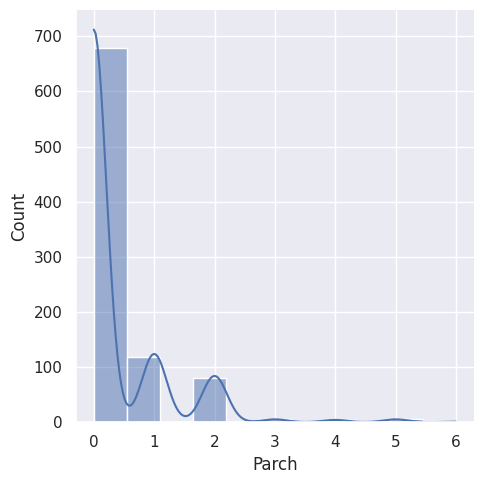

In [1186]:
# Let's plot the Parch to see it's distribution
sns.displot(train_data['Parch'], kde = True)

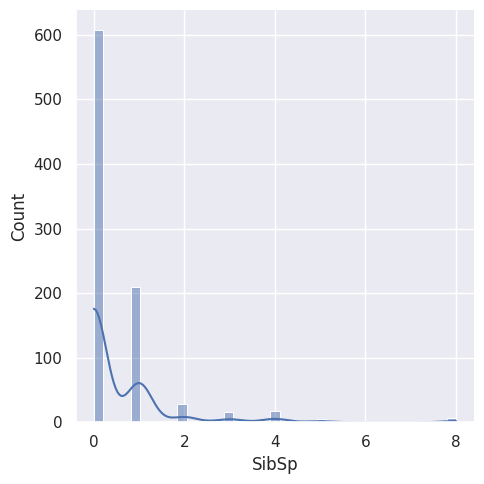

In [1187]:
# Let's plot the SibSp to understand the distribution
sns.displot(train_data['SibSp'], kde = True)

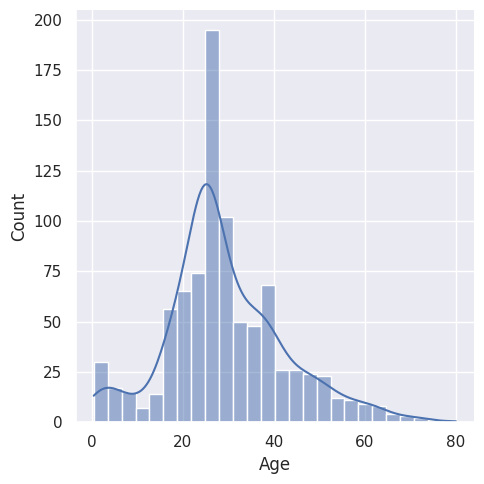

In [1188]:
# Let's understand the distribution of Age column
sns.displot(train_data['Age'], kde = True)

(0.0, 1000.0)

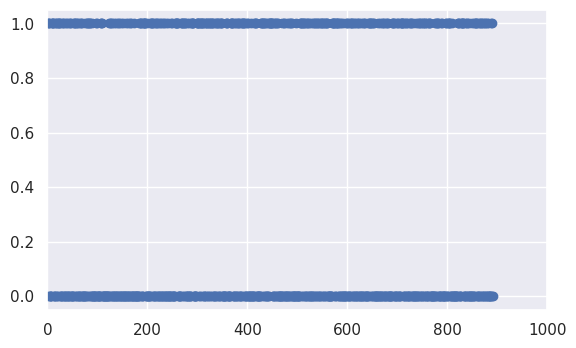

In [1189]:
# LEt's observe the relation between the PassengerId and Survived to see if there is any pattern. But it looks like there is no pattern so we can drop the column
fig1 = plt.figure(figsize= (5,3))
axes1 = fig1.add_axes([0,0, 1,1])
axes1.scatter(x = train_data['PassengerId'], y = train_data['Survived'])
axes1.set_xlim(0, 1000)

Text(0.5, 1.0, 'Survival Count by Pclass')

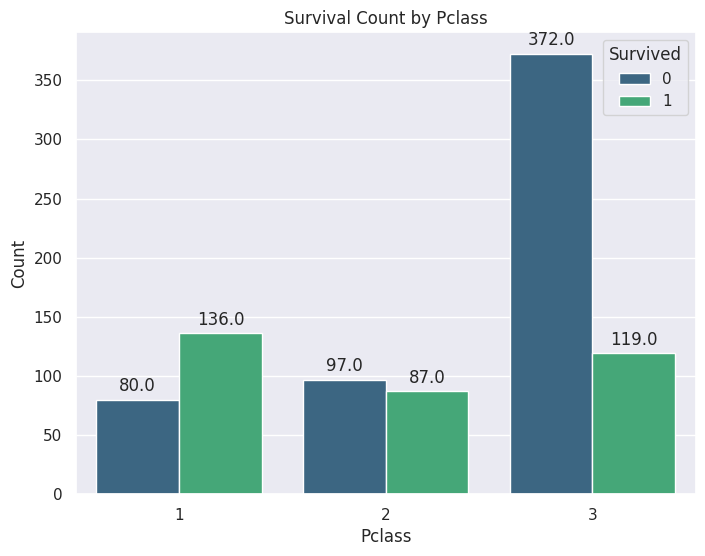

In [1190]:
# Let's see many survived on the basis of Pclass

plt.figure(figsize=(8, 6))
ax = sns.countplot(x="Pclass", hue="Survived", data=train_data, palette="viridis")

# Adding count labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adding labels and title
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Survival Count by Pclass")

Text(0.5, 1.0, 'Survival Count by Sex')

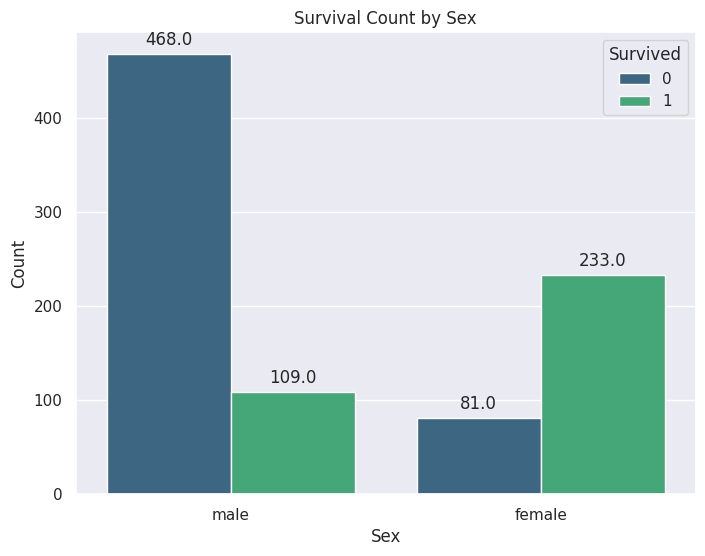

In [1191]:
# Let's see how many survive on the basis of sex

plt.figure(figsize=(8, 6))
ax = sns.countplot(x="Sex", hue="Survived", data=train_data, palette="viridis")

# Adding count labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adding labels and title
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Survival Count by Sex")

Text(0.5, 1.0, 'Distribution of Age based on Survival')

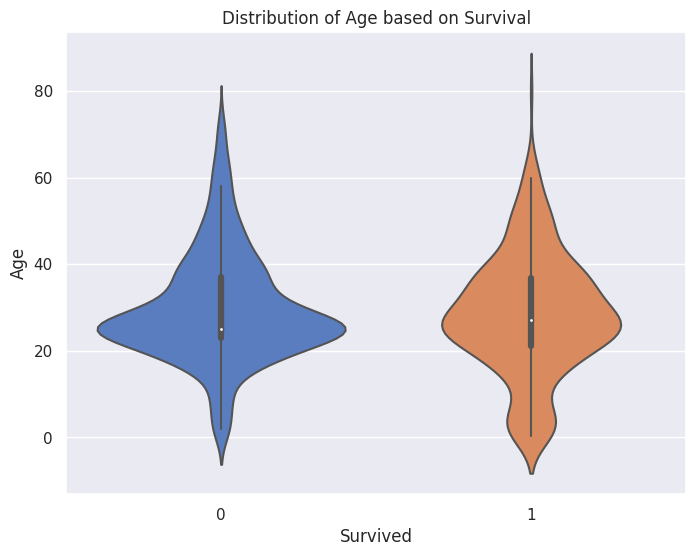

In [1192]:
# Let's see how the age is distributed on whether they survived or not

plt.figure(figsize=(8, 6))
sns.violinplot(x="Survived", y="Age", data=train_data, palette="muted")

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Distribution of Age based on Survival')

Text(0.5, 1.0, 'Distribution of Fare based on Survival')

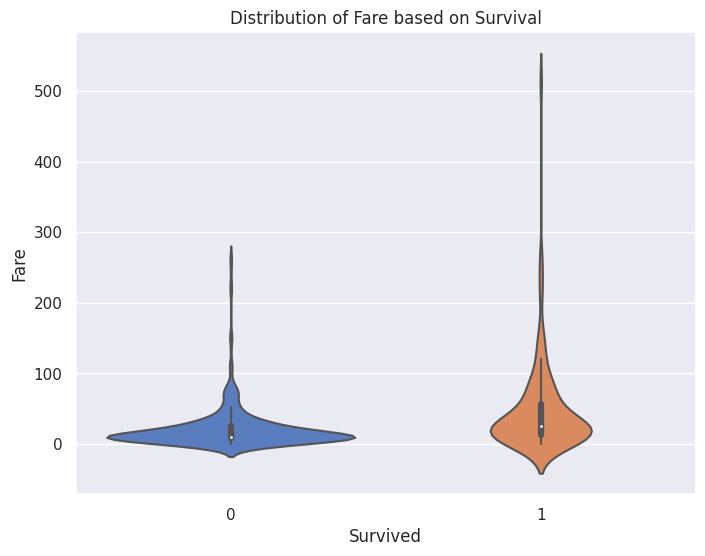

In [1193]:
# Fare distribution on whether they survived or not

plt.figure(figsize=(8, 6))
sns.violinplot(x="Survived", y="Fare", data=train_data, palette="muted")

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.title('Distribution of Fare based on Survival')

In [1194]:
# Let's see the unique values in Cabin column
train_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [1195]:
survival_by_cabin = train_data.groupby('Cabin')['Survived'].mean()

In [1196]:
survival_by_cabin

Cabin
A10    0.0
A14    0.0
A16    1.0
A19    0.0
A20    1.0
      ... 
F33    1.0
F38    0.0
F4     1.0
G6     0.5
T      0.0
Name: Survived, Length: 147, dtype: float64

In [1197]:
# Let's check the mean of survived on the subgroup basis
survival_by_port = train_data.groupby('Embarked')['Survived'].mean()

In [1198]:
survival_by_port

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [1199]:
# Let's see how the fare is on the basis of Pclass and see if they are related in anyway
train_data.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [1200]:
# Looks like PassengerId, Name, Ticket and Cabin cannot interpret whether a person survived or not so let's drop them
main_train_data = train_data.drop(columns=['PassengerId',	'Name',	'Ticket', 'Cabin'], axis = 1)

In [1201]:
# Let's observe the correlation between the numerical features
main_train_data[['Age',	'SibSp',	'Parch',	'Fare', 'Pclass' ]].corr()

,Age,SibSp,Parch,Fare,Pclass
Age,1.000000,-0.243452,-0.175799,0.120886,-0.403858
SibSp,-0.243452,1.000000,0.414838,0.159651,0.083081
Parch,-0.175799,0.414838,1.000000,0.216225,0.018443
Fare,0.120886,0.159651,0.216225,1.000000,-0.549500
Pclass,-0.403858,0.083081,0.018443,-0.549500,1.000000


In [1202]:
# Feature ENgineering: Let's add an interaction term between Pclass and Fare based on the correlation
train_data['Pclass_Fare_interaction'] = train_data['Pclass'] * train_data['Fare']

In [1203]:
# Let's create dummies for the categorical variables
train_data = pd.get_dummies(train_data, columns = ['Pclass','Sex', 'Embarked'], drop_first= True)

In [1204]:
# Let's drop the columns which dont seem to have a plausible significance
train_data.drop(columns=['PassengerId',	'Name',	'Ticket', 'Cabin'], axis = 1, inplace = True)

In [1205]:
train_data.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_Fare_interaction,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,21.7500,0,1,1,0,1
1,1,38.0,1,0,71.2833,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,23.7750,0,1,0,0,1
3,1,35.0,1,0,53.1000,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,24.1500,0,1,1,0,1


In [1206]:
# Let's divide the data into features and target
X_train = train_data.drop(columns = ['Survived'], axis = 1)
Y_train = train_data['Survived']

In [1207]:
from sklearn.preprocessing import StandardScaler

In [1208]:
# Let's scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_Fare_interaction']])
columns = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_Fare_interaction']
X_train_scaled = pd.DataFrame(X_train_scaled, columns= columns)
X_train_scaled = pd.concat([X_train_scaled,X_train.iloc[:, 5:]], axis = 1)




In [1209]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [1210]:
# Run the Logistic regression on the original data
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, Y_train)
logistic_cv_scores = cross_val_score(logistic_model, X_train_scaled, Y_train, cv = 6, scoring = 'accuracy')

In [1211]:
# Print the CV scores
print(logistic_cv_scores)
print(f'mean_cv_scores: {np.mean(logistic_cv_scores)}')

[0.76510067 0.81208054 0.81208054 0.77702703 0.79054054 0.83783784]
mean_cv_scores: 0.7991111917286413


In [1212]:
# Make the predictions
Y_train_pred_prob = logistic_model.predict_proba(X_train_scaled)
Y_train_pred = (Y_train_pred_prob[:,1] > 0.5).astype(int)


In [1213]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, auc, roc_curve, accuracy_score

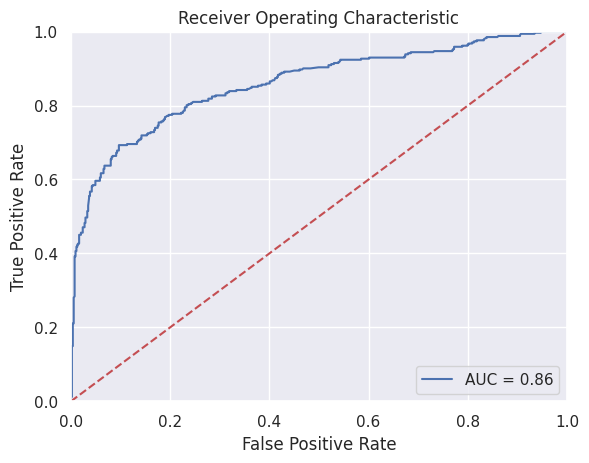

In [1214]:
# Plot the ROC curve
fpr, tpr, threshold = roc_curve(Y_train, Y_train_pred_prob[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1215]:
# Check for accuracy score
accuracy_score(Y_train, Y_train_pred)

0.8103254769921436

In [1216]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [1217]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [1218]:
# Preprocess the test data similar to what we did for the train data
test_data['Age'].fillna(test_data['Age'].mean(), inplace = True)

In [1219]:
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace = True)

In [1220]:
test_data['Pclass_Fare_interaction'] = test_data['Pclass'] * test_data['Fare']

In [1221]:
main_test_data = test_data

In [1222]:
test_data = pd.get_dummies(test_data, columns = ['Pclass','Sex', 'Embarked'], drop_first= True)

In [1223]:
test_data.drop(columns=['Name',	'Ticket', 'Cabin'], axis = 1, inplace = True)

In [1224]:
X_test = test_data.drop(columns = ['PassengerId'], axis = 1)

In [1225]:
# Scale the test data
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test[['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_Fare_interaction']])
columns = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_Fare_interaction']
X_test_scaled = pd.DataFrame(X_test_scaled, columns= columns)
X_test_scaled = pd.concat([X_test_scaled, X_test.iloc[:,5:]], axis = 1)

In [1226]:
# Make predictions on the test data
Y_test_pred_prob = logistic_model.predict_proba(X_test_scaled)
Y_test_pred = np.where(Y_test_pred_prob[:, 1] > 0.5, 1, 0)

In [1227]:
# Convert it into a dataframe
a = test_data['PassengerId']
final_data_pred = pd.DataFrame({'PassengerId': a, 'Survived': Y_test_pred})

In [1228]:
# Export the final results into a csv
final_data_pred.to_csv('titanic_final_results.csv', index= False)

In [1229]:
final_data_pred

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


Tuning the Logistic Regression

In [1230]:
from sklearn.feature_selection import SequentialFeatureSelector

In [1231]:
# Perform backward feature selection to try to improve the performance of the model
backward_feature_selector = SequentialFeatureSelector(logistic_model, n_features_to_select= 'auto', direction = 'backward', scoring = 'accuracy', cv = 5)
backward_feature_selector.fit_transform(X_train_scaled, Y_train)

array([[-0.55236029, -0.50244517, -0.57796472,  1.        ,  1.        ],
       [ 0.65947522,  0.78684529,  0.38293558,  0.        ,  0.        ],
       [-0.24940141, -0.48885426, -0.53868159,  1.        ,  0.        ],
       ...,
       [-0.31449064, -0.17626324,  0.36483042,  1.        ,  0.        ],
       [-0.24940141, -0.04438104, -0.41792233,  0.        ,  1.        ],
       [ 0.20503691, -0.49237783, -0.5488661 ,  1.        ,  1.        ]])

In [1232]:
backward_feature_selector.get_support()

array([ True, False, False,  True,  True, False,  True,  True, False,
       False])

In [1233]:
# See which all columns contribute to improve the performance
backward_feature_selector.get_feature_names_out().tolist()

['Age', 'Fare', 'Pclass_Fare_interaction', 'Pclass_3', 'Sex_male']

In [1234]:
# Filter out the best columns
X_train_scaled_tuned = X_train_scaled[backward_feature_selector.get_feature_names_out().tolist()]

In [1235]:
# RUn the logistic regression once again
tuned_logistic_model = LogisticRegression(max_iter=1000)
tuned_logistic_model.fit(X_train_scaled_tuned, Y_train)
tuned_logistic_cv_scores = cross_val_score(tuned_logistic_model, X_train_scaled_tuned, Y_train, cv = 6, scoring='accuracy')

In [1236]:
# Check for cv scores, looks like there is no noticable improvement
print(tuned_logistic_cv_scores)
print(f'mean_cv_scores: {np.mean(tuned_logistic_cv_scores)}')

[0.79194631 0.80536913 0.83221477 0.75       0.79054054 0.82432432]
mean_cv_scores: 0.7990658443678579


In [1237]:
# Try making predictions on training data
Y_train_tuned_pred_prob = tuned_logistic_model.predict_proba(X_train_scaled_tuned)
Y_train_tuned_pred = (Y_train_tuned_pred_prob[:,1] > 0.6).astype(int)


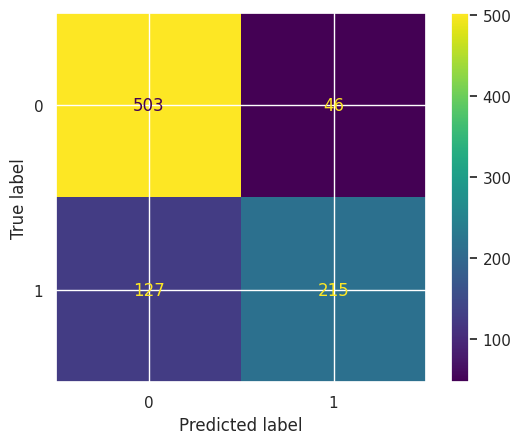

In [1238]:
# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix(Y_train, Y_train_tuned_pred)).plot()

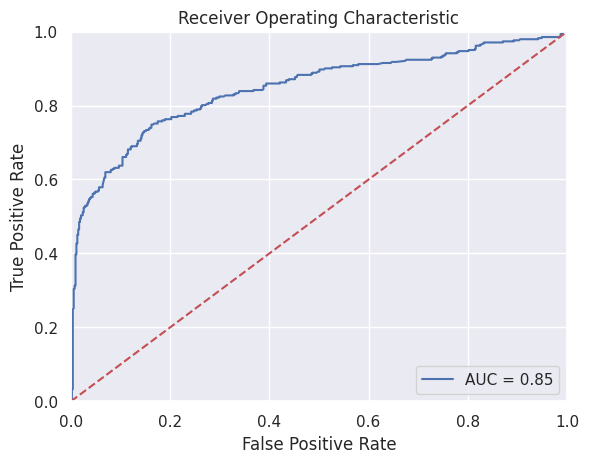

In [1239]:
# Plot the ROC
fpr, tpr, threshold = roc_curve(Y_train, Y_train_tuned_pred_prob[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1240]:
# Check for acccuracy
accuracy_score(Y_train, Y_train_tuned_pred)

0.8058361391694725

In [1241]:
# Filter the columns for the test data
X_test_scaled_tuned = X_test_scaled[backward_feature_selector.get_feature_names_out().tolist()]

In [1242]:
# Make predictions on the test data
Y_test_tuned_pred_prob = tuned_logistic_model.predict_proba(X_test_scaled_tuned)
Y_test_tuned_pred = np.where(Y_test_tuned_pred_prob[:, 1] > 0.5, 1, 0)

In [1243]:
# cONVERT IT INTO A dataframe
a = test_data['PassengerId']
final_data_pred = pd.DataFrame({'PassengerId': a, 'Survived': Y_test_tuned_pred})

In [1244]:
# Export the results
final_data_pred.to_csv('titanic_final_results_tuned_logistic.csv', index= False)

RandomForest

In [1253]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [1254]:
# Let's now run the Random Forest Model on the original data
randomforest_model = RandomForestClassifier(random_state = 43, n_estimators= 1000, max_depth= None)
cv_scores = cross_val_score(randomforest_model, X_train_scaled, Y_train, cv=5, scoring='accuracy')

In [1255]:
# Print the CV scores
print(cv_scores)
print(f'mean : {np.mean(cv_scores)}')

[0.79888268 0.79213483 0.84831461 0.7752809  0.83146067]
mean : 0.8092147385600402


In [1256]:
# Let's fit the RF Model
randomforest_model.fit(X_train_scaled, Y_train)

RandomForestClassifier(n_estimators=1000, random_state=43)

In [1257]:
# Let's make predictions on training data
random_forest_train_pred_prob = randomforest_model.predict_proba(X_train_scaled)
random_forest_train_pred = random_forest_train_pred_prob[:,1] > 0.5

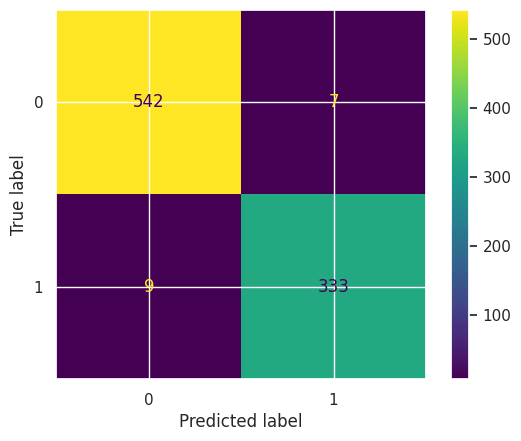

In [1258]:
# Plot the confusion matrix
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_train, random_forest_train_pred)).plot()

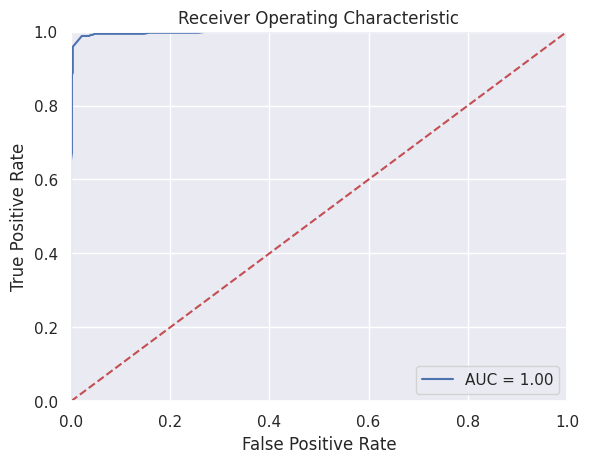

In [1259]:
# Plot the ROC
fpr, tpr, threshold = roc_curve(Y_train, random_forest_train_pred_prob[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1260]:
# Print the accuracy
accuracy_score(Y_train, random_forest_train_pred)

0.9820426487093153

In [1261]:
# Let's make predictions on the test data
random_forest_test_pred_prob = randomforest_model.predict_proba(X_test_scaled)
random_forest_test_pred = np.where(random_forest_test_pred_prob[:, 1] > 0.5, 1, 0)

In [1262]:
# Convert it into a dataframe
a = test_data['PassengerId']
final_data_randomforest_pred = pd.DataFrame({'PassengerId': a, 'Survived': random_forest_test_pred})

In [1263]:
# Export the results
final_data_randomforest_pred.to_csv('final_randomforest_results.csv', index= False)

Grid Search


In [1264]:
# Let's explore grid search
param_grid_rf = {
    'n_estimators': [500, 1000, 2000],
    'min_samples_split': [2, 5, 10]
}

In [1265]:
# Let's run the grid search for hyper parameter tuning
grid_search_rf = GridSearchCV(estimator=randomforest_model, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, Y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=1000,
                                              random_state=43),
             n_jobs=-1,
             param_grid={'min_samples_split': [2, 5, 10],
                         'n_estimators': [500, 1000, 2000]},
             scoring='accuracy')

In [1266]:
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

In [1267]:
# Let's make the predictions on training data
random_forest_train_pred_prob = best_rf_model.predict_proba(X_train_scaled)
random_forest_train_pred = random_forest_train_pred_prob[:,1] > 0.5

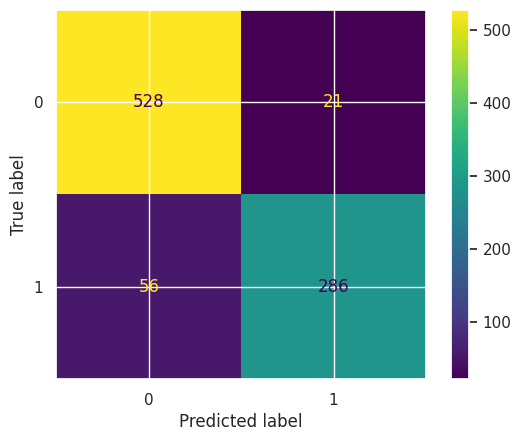

In [1268]:
# Plot the Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_train, random_forest_train_pred)).plot()

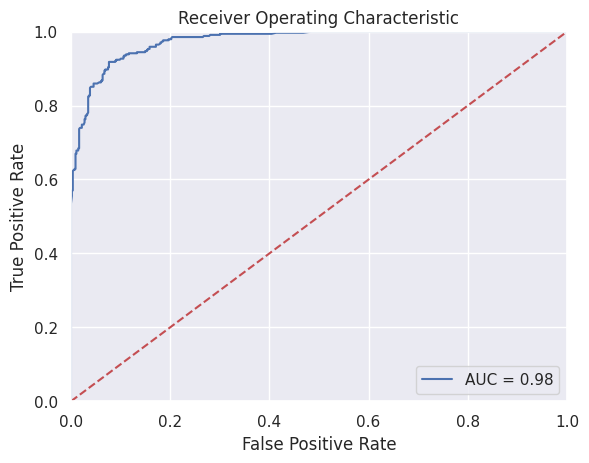

In [1269]:
# Plot the ROC curve
fpr, tpr, threshold = roc_curve(Y_train, random_forest_train_pred_prob[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1270]:
# Let's check the accuracy
accuracy_score(Y_train, random_forest_train_pred)

0.9135802469135802

In [1271]:
# Let's make predictions on test data sing the best parameter
random_forest_test_pred_prob = randomforest_model.predict_proba(X_test_scaled)
random_forest_test_pred = np.where(random_forest_test_pred_prob[:, 1] > 0.5, 1, 0)

In [1272]:
# Convert it to Df
a = test_data['PassengerId']
final_data_randomforest_pred = pd.DataFrame({'PassengerId': a, 'Survived': random_forest_test_pred})

In [1273]:
# Export the results
final_data_randomforest_pred.to_csv('final_randomforest_results_gs.csv', index= False)

Boosting Model

In [1274]:
# Let's run the Gradient boosting model
boosting_model = GradientBoostingClassifier(n_estimators= 1000, learning_rate= 0.0099 , random_state=1)
cv_scores = cross_val_score(boosting_model, X_train_scaled, Y_train, cv=5, scoring='accuracy')

In [1275]:
# Print the CV scores
print(cv_scores)
print(f'mean : {np.mean(cv_scores)}')

[0.81564246 0.82022472 0.84831461 0.79775281 0.86516854]
mean : 0.8294206264515724


In [1276]:
# Fit the model
boosting_model.fit(X_train_scaled, Y_train)

GradientBoostingClassifier(learning_rate=0.0099, n_estimators=1000,
                           random_state=1)

In [1277]:
# Importance_ = pd.DataFrame({'Importance':boosting_model.feature_importances_*100}, index= ['Age',	'SibSp',	'Parch',	'Fare', 'Pclass_2', 'Pclass_3',	'Sex_male',	'Embarked_Q',	'Embarked_S']	)
# Importance = Importance_.sort_values('Importance', axis=0, ascending=False)[0:20]
# Importance.plot(kind='barh', color='b', ).invert_yaxis()
# plt.xlabel('Variable Importance')
# plt.gca().legend_ = None

In [1278]:
# Predict on the training
boosting_train_pred_prob = boosting_model.predict_proba(X_train_scaled)
boosting_train_pred = boosting_train_pred_prob[:,1] > 0.5

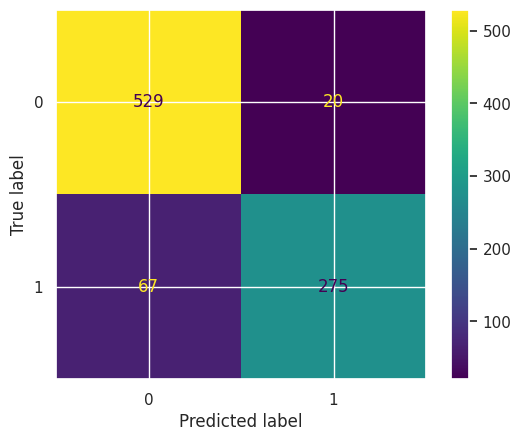

In [1279]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_train, boosting_train_pred)).plot()

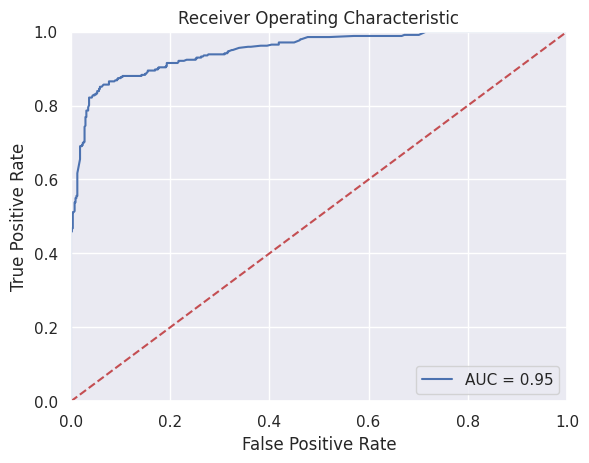

In [1280]:
# PLot the ROC curve
fpr, tpr, threshold = roc_curve(Y_train, boosting_train_pred_prob[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1281]:
# Test the accuracy
accuracy_score(Y_train, boosting_train_pred)

0.9023569023569024

In [1282]:
# Make predictions on Testing
boosting_test_pred_prob = boosting_model.predict_proba(X_test_scaled)
boosting_test_pred = np.where(boosting_test_pred_prob[:, 1] > 0.5, 1, 0)

In [1283]:
a = test_data['PassengerId']
final_data_boosting_pred = pd.DataFrame({'PassengerId': a, 'Survived': boosting_test_pred})

In [1284]:
#Export results
final_data_boosting_pred.to_csv('final_boosting_results.csv', index= False)

LDA as a classifier

In [1285]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [1286]:
# Try LDA as a classifier
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train_scaled, Y_train)
lda_cv_scores = cross_val_score(lda_model, X_train_scaled, Y_train, cv = 6, scoring = 'accuracy')

In [1287]:
# Based on CV scores the results aren't great
print(lda_cv_scores)
print(f'mean_cv_scores: {np.mean(lda_cv_scores)}')

[0.77181208 0.79865772 0.81879195 0.77702703 0.77027027 0.81081081]
mean_cv_scores: 0.7912283088457585


XGBoosting

In [1288]:
from xgboost import XGBClassifier

In [1289]:
# Let's try XGBoosting model
xgb_model = XGBClassifier(learning_rate = 0.005, n_estimators = 800, random_state = 1)
cv_scores = cross_val_score(xgb_model, X_train_scaled, Y_train, cv=5)

In [1290]:
# Print the CV scores
print(cv_scores)
print(f'mean : {np.mean(cv_scores)}')

[0.83240223 0.80337079 0.86516854 0.80898876 0.87078652]
mean : 0.8361433682756889


In [1291]:
# Fit the model
xgb_model.fit(X_train_scaled, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [1292]:
# Make predictions on training
xgb_train_pred_prob = xgb_model.predict_proba(X_train_scaled)
xgb_train_pred = xgb_train_pred_prob[:,1] > 0.5

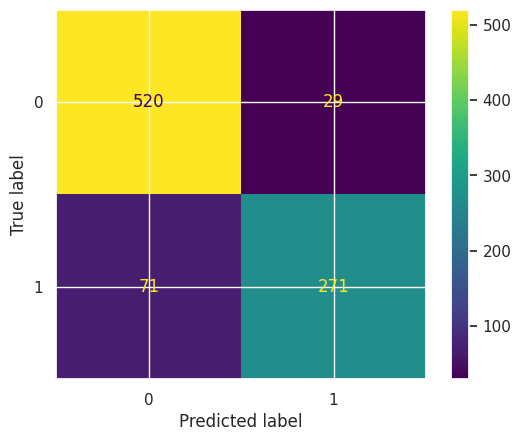

In [1293]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_train, xgb_train_pred)).plot()

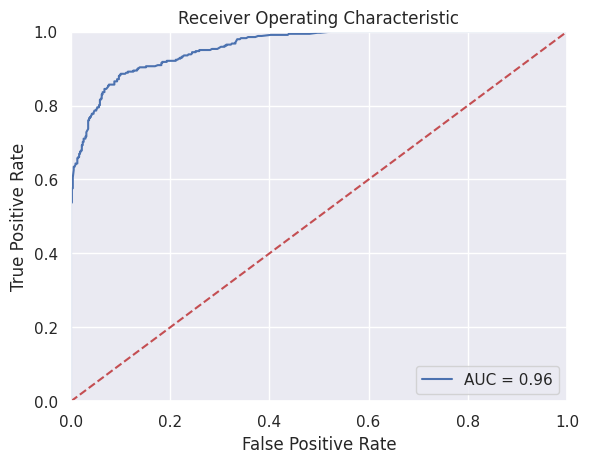

In [1294]:
# PLot the ROC
fpr, tpr, threshold = roc_curve(Y_train, xgb_train_pred_prob[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1295]:
accuracy_score(Y_train, xgb_train_pred)

0.8877665544332211

In [1296]:
# Make prediction on testing
xgb_test_pred_prob = xgb_model.predict_proba(X_test_scaled)
xgb_test_pred = np.where(xgb_test_pred_prob[:, 1] > 0.5, 1, 0)

In [1297]:
#Export results
a = test_data['PassengerId']
final_data_xgb_pred = pd.DataFrame({'PassengerId': a, 'Survived': xgb_test_pred})
final_data_xgb_pred.to_csv('final_xgb_results.csv', index= False)

Ensemble Methods

In [1298]:
from sklearn.ensemble import StackingClassifier

In [1299]:
base_models = [
    ('xgb', XGBClassifier(learning_rate = 0.005, n_estimators = 800)),
    ('rf', RandomForestClassifier(n_estimators=1000, random_state=43)),
    ('gb', GradientBoostingClassifier(n_estimators=1000, learning_rate = 0.0099, random_state=43))
]

In [1300]:
# Let's run a stacked classifier
meta_model = LogisticRegression()
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
cv_scores = cross_val_score(stacking_model, X_train_scaled, Y_train, cv=5, scoring='accuracy')


In [1301]:
# PRint the CV_scores
print(cv_scores)
print(f'mean : {np.mean(cv_scores)}')

[0.81564246 0.81460674 0.87640449 0.80337079 0.86516854]
mean : 0.8350386039796623


In [1302]:
# Fit the model
stacking_model.fit(X_train_scaled, Y_train)

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_...
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=800, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...)),
                               ('rf',
                                RandomForestClassifier(n_estimators=1000,
                                                       random_state=43)),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.0099,
                                                           n_estimators=1000,
                                                           random_state=43))],
                   final_estimator=LogisticRegression())

In [1303]:
# Predict on training data
stacking_train_pred_prob = stacking_model.predict_proba(X_train_scaled)
stacking_train_pred = stacking_train_pred_prob[:,1] > 0.5

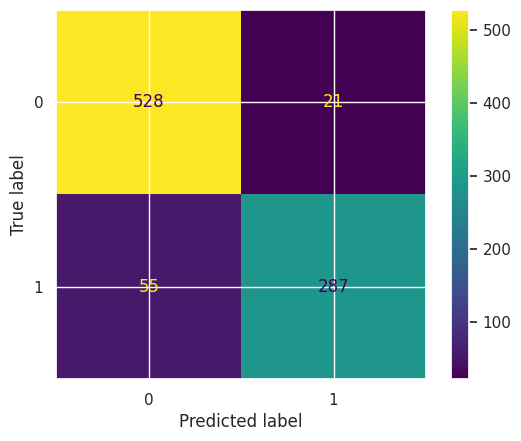

In [1304]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_train, stacking_train_pred)).plot()

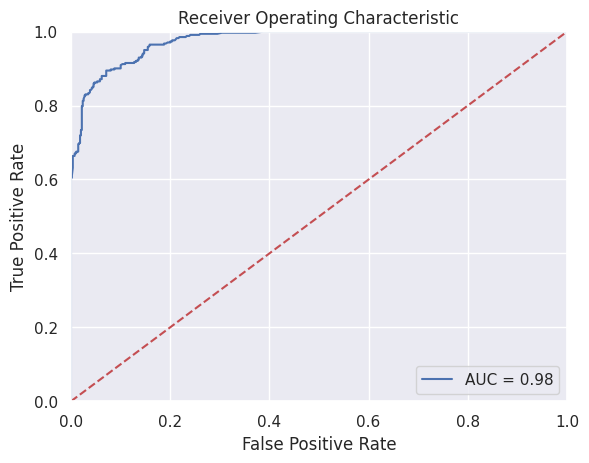

In [1305]:
fpr, tpr, threshold = roc_curve(Y_train, stacking_train_pred_prob[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1306]:
accuracy_score(Y_train, stacking_train_pred)

0.9147025813692481

In [1307]:
# Predit on testing
stacking_test_pred_prob = stacking_model.predict_proba(X_test_scaled)
stacking_test_pred = np.where(stacking_test_pred_prob[:, 1] > 0.5, 1, 0)

In [1308]:
# Export the results
a = test_data['PassengerId']
final_data_stacking_pred = pd.DataFrame({'PassengerId': a, 'Survived': stacking_test_pred})

In [1309]:
final_data_stacking_pred.to_csv('final_stacking_results.csv', index= False)

Feature Engineering

In [1377]:
# Let's introduce new features using basic domain knowledge
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
train_data['IsAlone'] = (train_data['FamilySize'] == 1).astype(int)

test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data['IsAlone'] = (test_data['FamilySize'] == 1).astype(int)


In [1378]:
X_train_fe = train_data.drop(columns= 'Survived', axis = 1)
X_test_fe = test_data


In [1379]:
X_train_fe.head()

,Age,SibSp,Parch,Fare,Pclass_Fare_interaction,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,FamilySize,IsAlone,AgeClassInteraction,FarePerPerson
0,22.0,1,0,7.2500,21.7500,0,1,1,0,1,2,0,66.0,3.62500
1,38.0,1,0,71.2833,71.2833,0,0,0,0,0,2,0,38.0,35.64165
2,26.0,0,0,7.9250,23.7750,0,1,0,0,1,1,1,78.0,7.92500
3,35.0,1,0,53.1000,53.1000,0,0,0,0,1,2,0,35.0,26.55000
4,35.0,0,0,8.0500,24.1500,0,1,1,0,1,1,1,105.0,8.05000


In [1380]:
# Scale the data ths time using MINMAX
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled_fe = scaler.fit_transform(X_train_fe)
X_train_scaled_fe = pd.DataFrame(X_train_fe, columns = ['Age','SibSp','Parch',	'Fare','Pclass_Fare_interaction',	'Pclass_2',	'Pclass_3',	'Sex_male','Embarked_Q',	'Embarked_S',	'FamilySize',	'IsAlone'])


scaler = MinMaxScaler()
X_test_scaled_fe = scaler.fit_transform(X_test_fe)
X_test_scaled_fe = pd.DataFrame(X_test_fe, columns = ['Age','SibSp','Parch',	'Fare','Pclass_Fare_interaction',	'Pclass_2',	'Pclass_3',	'Sex_male','Embarked_Q',	'Embarked_S',	'FamilySize',	'IsAlone'])


In [1381]:
# Let's run all the models once again to see if there is any improvement
models = [
          LogisticRegression(max_iter = 1000),
          XGBClassifier(learning_rate = 0.005, n_estimators = 800),
          RandomForestClassifier(n_estimators=1000, random_state=43),
          GradientBoostingClassifier(n_estimators=1000, learning_rate = 0.0099, random_state=43)]

In [1382]:
# RUn all models using control flow
from sklearn.metrics import make_scorer

scorer = make_scorer(accuracy_score)

# Iterate through models
best_model = None
best_score = 0

for model in models:

    cv_scores = cross_val_score(model, X_train_scaled_fe, Y_train, cv=5, scoring=scorer)


    print(f"{model.__class__.__name__}: {np.mean(cv_scores)}")


    if np.mean(cv_scores) > best_score:
        best_model = model
        best_score = np.mean(cv_scores)


print(f"\nBest Model: {best_model.__class__.__name__}")
print(f"Best Average Cross-Validation Score: {best_score}")


LogisticRegression: 0.8024731655263324
XGBClassifier: 0.8417613458037788
RandomForestClassifier: 0.8024919967359236
GradientBoostingClassifier: 0.8372857949908983

Best Model: XGBClassifier
Best Average Cross-Validation Score: 0.8417613458037788


In [1383]:
# LEt's run xgb model on the latest train data
xgb_model = XGBClassifier(learning_rate = 0.005, n_estimators = 800, random_state = 1)
cv_scores = cross_val_score(xgb_model, X_train_scaled_fe, Y_train, cv=5)

In [1384]:
# Print the cv scores
print(cv_scores)
print(f'mean : {np.mean(cv_scores)}')

[0.83240223 0.82022472 0.88202247 0.82022472 0.85393258]
mean : 0.8417613458037788


In [1385]:
# Fit the model
xgb_model.fit(X_train_scaled_fe, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [1386]:
# Predict on training
xgb_train_pred_prob = xgb_model.predict_proba(X_train_scaled_fe)
xgb_train_pred = xgb_train_pred_prob[:,1] > 0.5

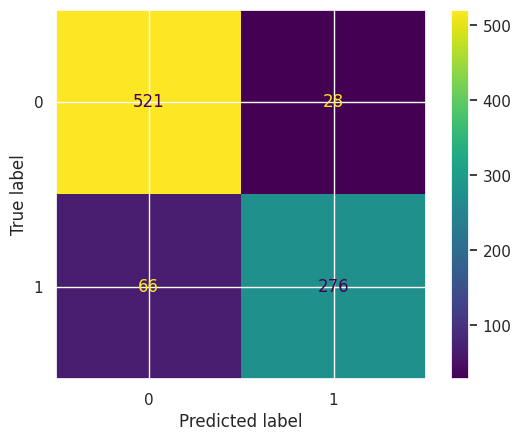

In [1387]:
ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(Y_train, xgb_train_pred)).plot()

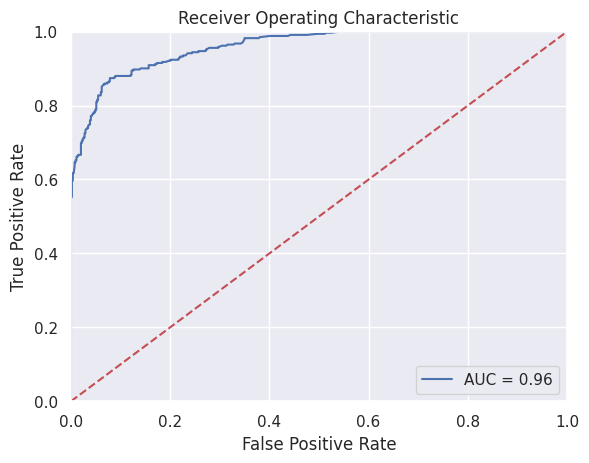

In [1388]:
fpr, tpr, threshold = roc_curve(Y_train, xgb_train_pred_prob[:,1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [1389]:
accuracy_score(Y_train, xgb_train_pred)

0.8945005611672279

In [1390]:
xgb_test_pred_prob = xgb_model.predict_proba(X_test_scaled_fe)
xgb_test_pred = np.where(xgb_test_pred_prob[:, 1] > 0.5, 1, 0)

In [1391]:
# Export the results
a = test_data['PassengerId']
final_data_xgb_pred = pd.DataFrame({'PassengerId': a, 'Survived': xgb_test_pred})
final_data_xgb_pred.to_csv('final_xgb_results.csv', index= False)

In [1392]:
# LEt's run the boosting model
boosting_model = GradientBoostingClassifier(n_estimators= 1000, learning_rate= 0.0099 , random_state=1)
cv_scores = cross_val_score(boosting_model, X_train_scaled_fe, Y_train, cv=5, scoring='accuracy')

In [1393]:
# Print the cv_scores
print(cv_scores)
print(f'mean : {np.mean(cv_scores)}')

[0.81564246 0.8258427  0.87640449 0.81460674 0.85393258]
mean : 0.8372857949908983


In [1394]:
# FIt the model
boosting_model.fit(X_train_scaled_fe, Y_train)

GradientBoostingClassifier(learning_rate=0.0099, n_estimators=1000,
                           random_state=1)

In [1395]:
# Predict on train data
boosting_train_pred_prob = boosting_model.predict_proba(X_train_scaled_fe)
boosting_train_pred = boosting_train_pred_prob[:,1] > 0.5

In [1396]:
accuracy_score(Y_train, boosting_train_pred)

0.9001122334455668

In [1397]:
boosting_test_pred_prob = boosting_model.predict_proba(X_test_scaled_fe)
boosting_test_pred = np.where(boosting_test_pred_prob[:, 1] > 0.5, 1, 0)

In [1398]:
a = test_data['PassengerId']
final_data_boosting_pred = pd.DataFrame({'PassengerId': a, 'Survived': boosting_test_pred})

In [1399]:
#Export the results, this gives the best results so far
final_data_boosting_pred.to_csv('final_boosting_results.csv', index= False)

In [1403]:
base_models = [
    ('gb', GradientBoostingClassifier(n_estimators=1000, learning_rate = 0.0099, random_state=43))
]

In [1404]:
# Run the stacked classifier on the new training data
meta_model = XGBClassifier(learning_rate = 0.005, n_estimators = 800, random_state = 1)
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)
cv_scores = cross_val_score(stacking_model, X_train_scaled_fe, Y_train, cv=5, scoring='accuracy')


In [1405]:
print(cv_scores)
print(f'mean : {np.mean(cv_scores)}')

[0.81005587 0.80337079 0.84269663 0.80337079 0.88202247]
mean : 0.8283033080158182


In [1407]:
stacking_model.fit(X_train_scaled_fe, Y_train)

StackingClassifier(estimators=[('gb',
                                GradientBoostingClassifier(learning_rate=0.0099,
                                                           n_estimators=1000,
                                                           random_state=43))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 device=None,
                                                 early_stopping_rounds=None,
                                                 enable_categorical=False,
                                                 eval_metric=None,
                                                 featur...,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.005,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=800, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

In [1408]:
stacking_test_pred_prob = stacking_model.predict_proba(X_test_scaled_fe)
stacking_test_pred = np.where(stacking_test_pred_prob[:, 1] > 0.5, 1, 0)

In [1409]:
a = test_data['PassengerId']
final_data_stacking_pred = pd.DataFrame({'PassengerId': a, 'Survived': stacking_test_pred})

In [1410]:
# Export results, this does not outperform the Gboosting model.
final_data_stacking_pred.to_csv('final_stacking_results.csv', index= False)